In [805]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [806]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [807]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [808]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [809]:
# Inspect the City data.
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [810]:
# Get the columns and the rows that are null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [811]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [812]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [813]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [814]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [815]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [816]:
# Inspect the Ride data.
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [817]:
# Get the columns and the rows that are null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [818]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [819]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [820]:
# Rename the columns in the merged dataframe.
pyber_data_df.rename(columns={'city': 'City', 'date':'Date', 'fare':'Fare', 'ride_id': 'Ride Id',
                              'driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [821]:
# Replace the index colume with the Date list.
pyber_data_df.set_index('Date', inplace = True)
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [822]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["City Type"]=="Urban"]
urban_cities_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [823]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["City Type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["City Type"] == "Rural"]

rural_cities_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-04-13 11:13:31,Randallchester,43.22,1076079536213,9,Rural
2019-02-02 14:54:00,North Holly,12.42,1985256326182,8,Rural
2019-03-27 18:27:34,Michaelberg,54.85,4421836952718,6,Rural
2019-02-23 21:12:24,Lake Latoyabury,47.90,3269652929887,2,Rural
2019-05-06 08:57:56,Lake Latoyabury,51.80,4018025271936,2,Rural


In [824]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["City"]).count()["Ride Id"]
urban_ride_count.head()

City
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: Ride Id, dtype: int64

In [825]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["City"]).count()["Ride Id"]
rural_ride_count = rural_cities_df.groupby(["City"]).count()["Ride Id"]

In [826]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["City"]).mean()["Fare"]
urban_avg_fare.head()

City
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: Fare, dtype: float64

In [827]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["City"]).mean()["Fare"]
rural_avg_fare = rural_cities_df.groupby(["City"]).mean()["Fare"]

In [828]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["City"]).mean()["No. Drivers"]
urban_driver_count.head()

City
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: No. Drivers, dtype: float64

In [829]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["City"]).mean()["No. Drivers"]
rural_driver_count = rural_cities_df.groupby(["City"]).mean()["No. Drivers"]

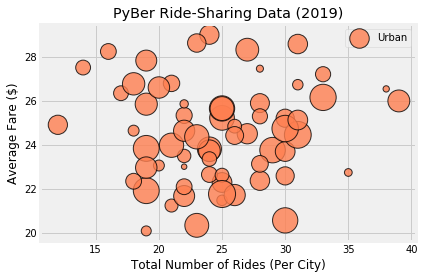

In [830]:
# Build the scatter plot for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

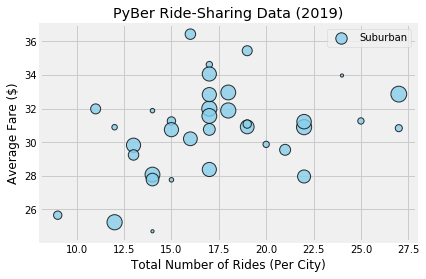

In [831]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

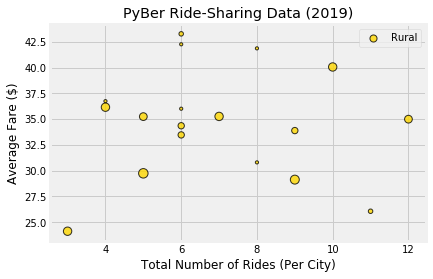

In [832]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

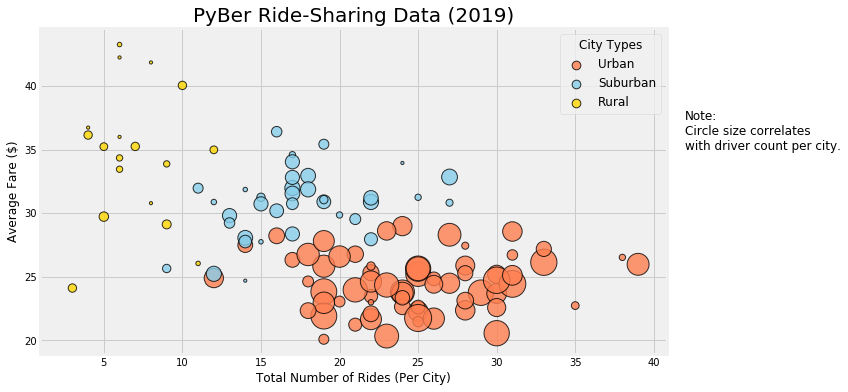

In [833]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [834]:
# Get summary statistics of Urban cities.
urban_cities_df.describe()

,Fare,Ride Id,No. Drivers
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [835]:
# Get summary statistics of Suburban cities.
suburban_cities_df.describe()

,Fare,Ride Id,No. Drivers
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [836]:
# Get summary statistics of Rural cities.
rural_cities_df.describe()

,Fare,Ride Id,No. Drivers
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [837]:
# Get summary statistics of Urban rides.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: Ride Id, dtype: float64

In [838]:
# Get summary statistics of Suburban rides.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: Ride Id, dtype: float64

In [839]:
# Get summary statistics of Rural rides.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: Ride Id, dtype: float64

In [840]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [841]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [842]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [843]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [844]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [845]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [846]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17]), count=array([7])).


In [847]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [848]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["Fare"]
urban_fares.head()

Date
2019-01-14 10:14:22    13.83
2019-03-04 18:24:09    30.24
2019-02-24 04:29:00    33.44
2019-02-10 23:22:03    23.44
2019-03-06 04:28:35    34.58
Name: Fare, dtype: float64

In [849]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [850]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["Fare"]
suburban_fares.head()

Date
2019-01-27 03:08:01    27.79
2019-04-07 19:44:19    18.75
2019-01-17 21:33:35    21.71
2019-02-27 17:38:39    17.10
2019-04-19 01:06:59    37.78
Name: Fare, dtype: float64

In [851]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [852]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["Fare"]
rural_fares.head()

Date
2019-04-13 11:13:31    43.22
2019-02-02 14:54:00    12.42
2019-03-27 18:27:34    54.85
2019-02-23 21:12:24    47.90
2019-05-06 08:57:56    51.80
Name: Fare, dtype: float64

In [853]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [854]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['No. Drivers']
urban_drivers.head()

Date
2019-01-14 10:14:22     5
2019-03-04 18:24:09    72
2019-02-24 04:29:00    57
2019-02-10 23:22:03    34
2019-03-06 04:28:35    46
Name: No. Drivers, dtype: int64

In [855]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['No. Drivers']
suburban_drivers.head()

Date
2019-01-27 03:08:01    11
2019-04-07 19:44:19    20
2019-01-17 21:33:35    22
2019-02-27 17:38:39    19
2019-04-19 01:06:59    12
Name: No. Drivers, dtype: int64

In [856]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['No. Drivers']
rural_drivers.head()

Date
2019-04-13 11:13:31    9
2019-02-02 14:54:00    8
2019-03-27 18:27:34    6
2019-02-23 21:12:24    2
2019-05-06 08:57:56    2
Name: No. Drivers, dtype: int64

In [857]:
# Calculate the measures of central tendency for the driver count for each city type.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")

The mean driver count for urban cities is 36.68.
The median driver count for urban cities is 37.00.
The mode driver count for urban cities is ModeResult(mode=array([39]), count=array([86])).
The mean driver count for suburban cities is 13.71.
The median driver count for suburban cities is 16.00.
The mode driver count for suburban cities is ModeResult(mode=array([20]), count=array([79])).
The mean driver count for rural cities is 4.30.
The median driver count for rural cities is 4.00.
The mode driver count for rural cities is ModeResult(mode=array([1]), count=array([32])).


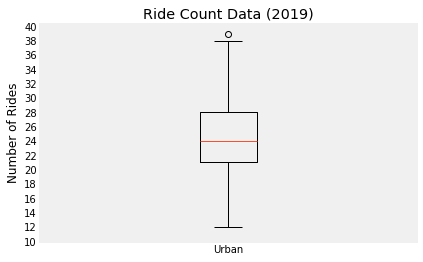

In [858]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

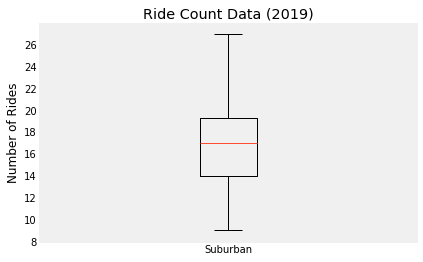

In [859]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8, 28, step=2.0))
ax.grid()
plt.show()

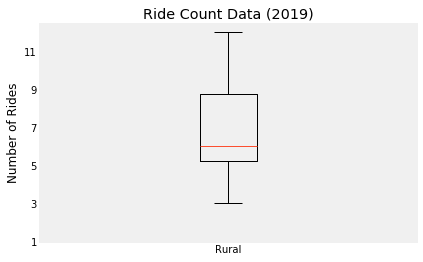

In [860]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(1, 12, step=2.0))
ax.grid()
plt.show()

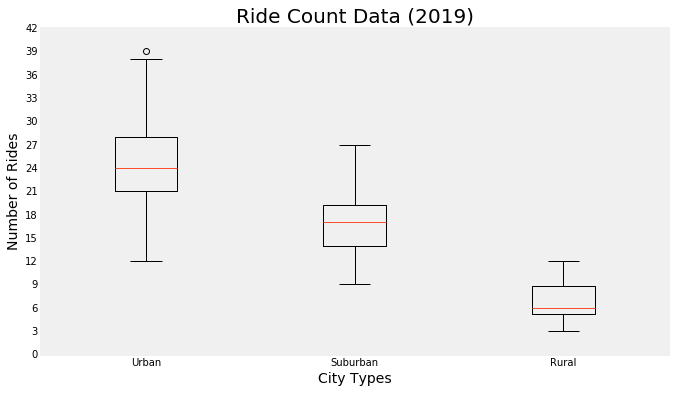

In [861]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [862]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


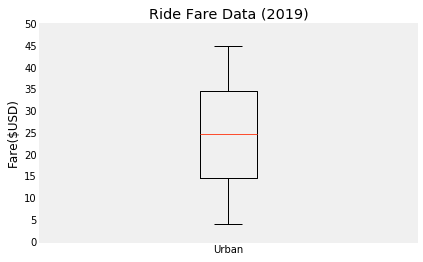

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: Fare, dtype: float64

In [863]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

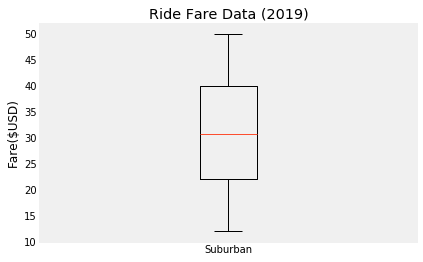

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: Fare, dtype: float64

In [864]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(10, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

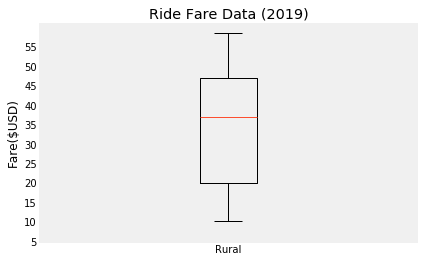

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: Fare, dtype: float64

In [865]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

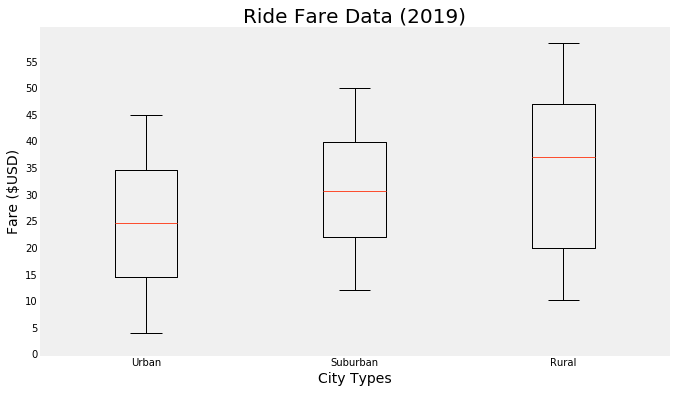

In [866]:
# Add all ride fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

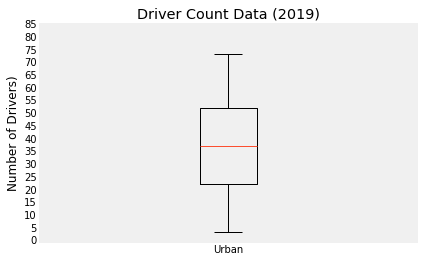

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: No. Drivers, dtype: float64

In [867]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

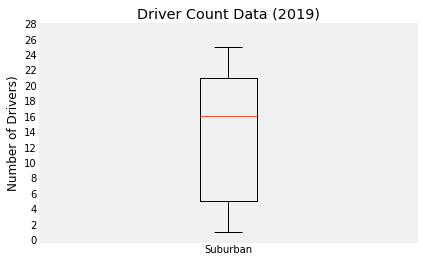

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: No. Drivers, dtype: float64

In [868]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

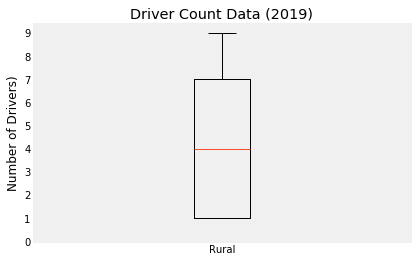

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: No. Drivers, dtype: float64

In [869]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

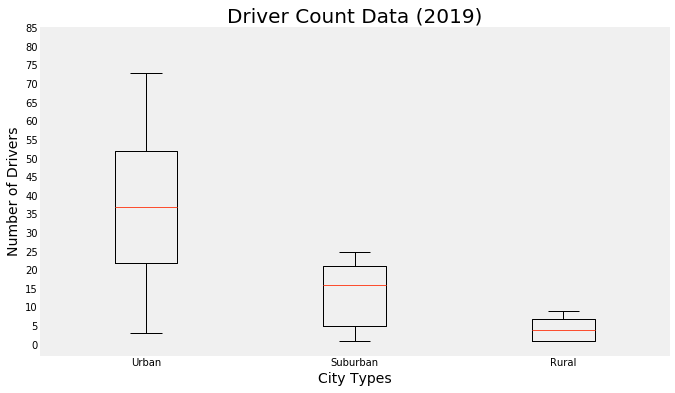

In [870]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [871]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["City Type"]).sum()["Fare"]
sum_fares_by_type

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [872]:
# Get the sum of all the fares.
total_fares = pyber_data_df["Fare"].sum()
total_fares

63538.64

In [873]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

City Type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: Fare, dtype: float64

In [874]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["City Type"]).sum()["Fare"] / pyber_data_df["Fare"].sum()
type_percents

City Type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: Fare, dtype: float64

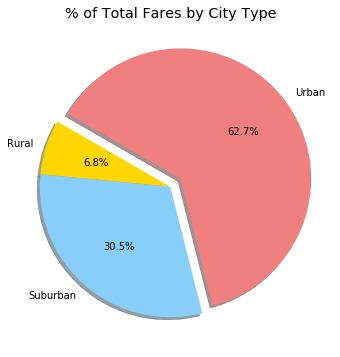

In [875]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [876]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["City Type"]).count()["Ride Id"] / pyber_data_df["Ride Id"].count()
ride_percents

City Type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: Ride Id, dtype: float64

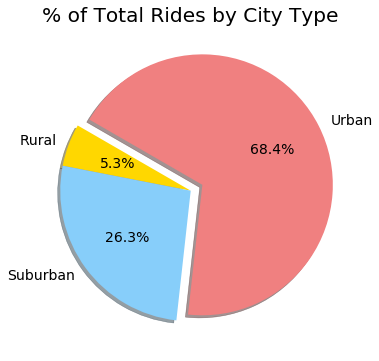

In [877]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [878]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * pyber_data_df.groupby(["City Type"]).sum()["No. Drivers"] / pyber_data_df["No. Drivers"].sum()
driver_percents

City Type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: No. Drivers, dtype: float64

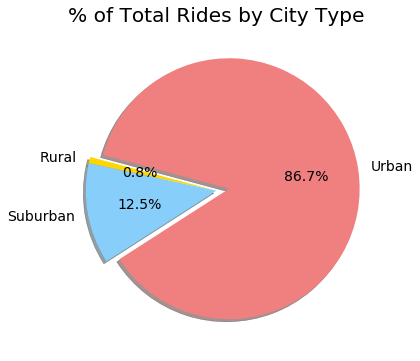

In [879]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

In [880]:
# Get the total number of rides for each city type.
total_ride_count = pyber_data_df.groupby(["City Type"]).count()["Ride Id"]
total_ride_count.head()

City Type
Rural        125
Suburban     625
Urban       1625
Name: Ride Id, dtype: int64

In [881]:
# Get the total number of drivers for each city type.
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [882]:
# Get the total fares for each city type.
total_fares = pyber_data_df.groupby(["City Type"]).sum()["Fare"]
total_fares.head()

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [883]:
# Get the average fare per ride for each city type.
avg_fare_ride = total_fares/total_ride_count
avg_fare_ride

City Type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [884]:
# Get the average fare per driver for each city type.
avg_fare_driver = total_fares/total_driver_count
avg_fare_driver

City Type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [885]:
# Initialize a list of city types.
city_types = ["Rural", "Suburban", "Urban"]
city_types

['Rural', 'Suburban', 'Urban']

In [886]:
# Initialize list of data for DataFrame.
summary_data = list(zip(city_types, total_ride_count, total_driver_count, 
                        total_fares, avg_fare_ride, avg_fare_driver))

In [887]:
# Create the challenge DataFrame 
final_df = pd.DataFrame(summary_data, columns = ['City Types','Total Rides', 'Total Drivers', 'Total Fares', 
                                                 'Average Fare per Ride', 'Average Fare per Driver'])

# Replace the index column with the City Types list.
final_df.set_index('City Types', inplace = True)

# Remove the index name.
del final_df.index.name

# Format the columns.
final_df["Total Rides"] = final_df["Total Rides"].map("{:,}".format)
final_df["Total Drivers"] = final_df["Total Drivers"].map("{:,}".format)
final_df["Total Fares"] = final_df["Total Fares"].map("${:,.2f}".format)
final_df["Average Fare per Ride"] = final_df["Average Fare per Ride"].map("${:.2f}".format)
final_df["Average Fare per Driver"] = final_df["Average Fare per Driver"].map("${:.2f}".format)

final_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [888]:
# Create a copy of the merged dataset and only include Date, Fare, and City Type.
pyber_data_copy_df = pyber_data_df[['Fare', 'City Type']].copy()
pyber_data_copy_df.head()

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban


In [889]:
# Set the index to the datetime data type.
pyber_data_copy_df.index = pd.to_datetime(pyber_data_copy_df.index)

In [890]:
# Check that the index is a datetime data type
pyber_data_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
Fare         2375 non-null float64
City Type    2375 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [891]:
# Create a series that sums fares by city type and date.
fare_by_type_date = pyber_data_copy_df.groupby(["City Type","Date"]).sum()["Fare"]
fare_by_type_date.head()

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
Name: Fare, dtype: float64

In [892]:
# Convert the series to a dataframe, reset the index.
fare_by_type_date_df = fare_by_type_date.to_frame().reset_index()
fare_by_type_date_df.head()

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [893]:
# Create a pivot table to sum fares by Date and City Type, convert to a dataframe.
fare_by_date_df = pd.pivot_table(fare_by_type_date_df,index=["Date"],
                                 columns=["City Type"],values=["Fare"],aggfunc=[np.sum])
fare_by_date_df.head()

sum                
                     Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75

In [894]:
# Rename columns on dataframe.
fare_by_date_df.columns = ["Rural", "Suburban", "Urban"]
fare_by_date_df.head()

,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [895]:
# Remove index name.
del fare_by_date_df.index.name
fare_by_date_df.head()

,Rural,Suburban,Urban
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [896]:
# Create a dataframe for a specific date range.
fare_date_range_df = fare_by_date_df.loc['2019-01-01':'2019-04-28']

# Reset the index.
fare_date_range_df.reset_index

fare_date_range_df.head()

,Rural,Suburban,Urban
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [897]:
# Put the data into weekly bins.
weekly_summary_df = fare_date_range_df.resample('1W').sum()
weekly_summary_df

,Rural,Suburban,Urban
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20
2019-03-10,303.94,925.27,2470.93


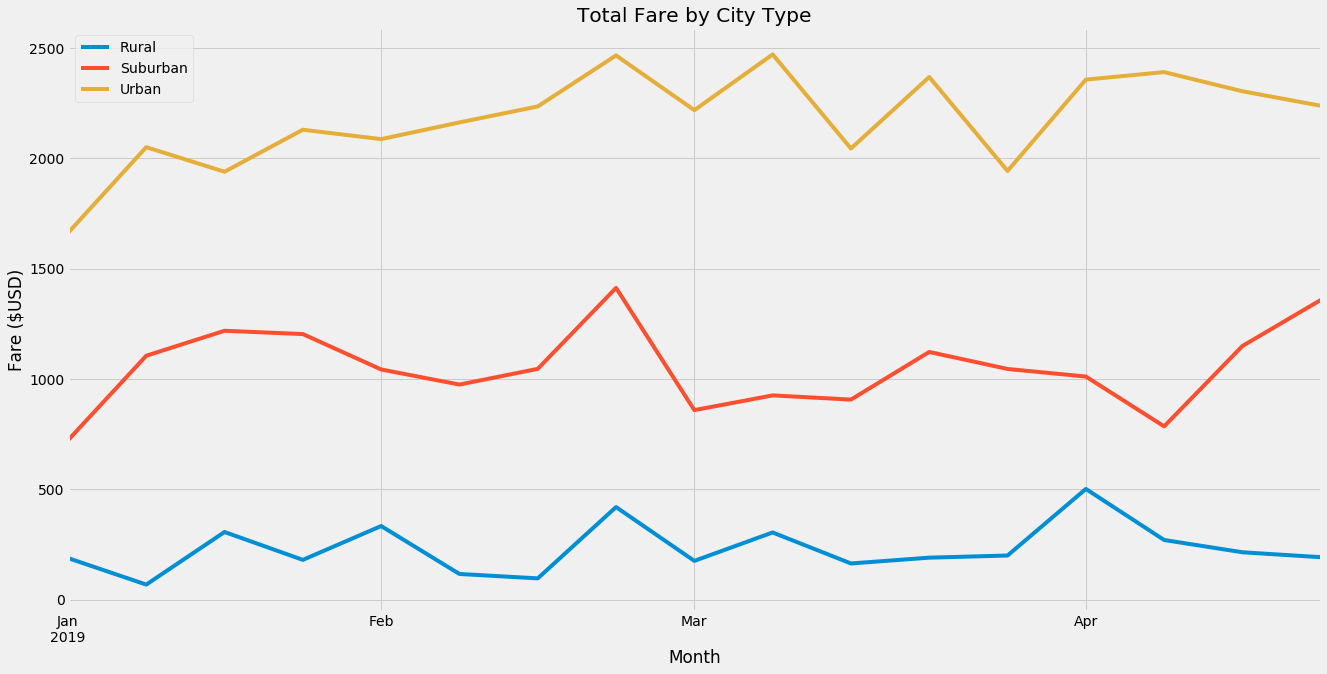

In [898]:
# Plot the dataframe on a line graph.
plt.style.use('fivethirtyeight')

weekly_summary_df.plot(figsize=(20,10))
plt.title ("Total Fare by City Type")
plt.xlabel("Month")
plt.ylabel("Fare ($USD)")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/FigChallenge.png")

plt.show()